<bound method DataFrame.info of         0  1      2      3       4     5   6  7                          8
0    18.0  8  307.0  130.0  3504.0  12.0  70  1  chevrolet chevelle malibu
1    15.0  8  350.0  165.0  3693.0  11.5  70  1          buick skylark 320
2    18.0  8  318.0  150.0  3436.0  11.0  70  1         plymouth satellite
3    16.0  8  304.0  150.0  3433.0  12.0  70  1              amc rebel sst
4    17.0  8  302.0  140.0  3449.0  10.5  70  1                ford torino
..    ... ..    ...    ...     ...   ...  .. ..                        ...
393  27.0  4  140.0  86.00  2790.0  15.6  82  1            ford mustang gl
394  44.0  4   97.0  52.00  2130.0  24.6  82  2                  vw pickup
395  32.0  4  135.0  84.00  2295.0  11.6  82  1              dodge rampage
396  28.0  4  120.0  79.00  2625.0  18.6  82  1                ford ranger
397  31.0  4  119.0  82.00  2720.0  19.4  82  1                 chevy s-10

[398 rows x 9 columns]>
    mpg  cylinders  displacement horsepower

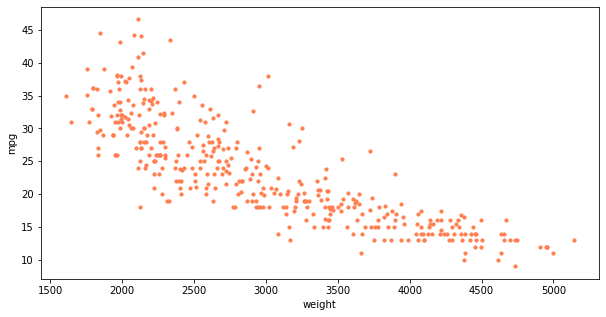

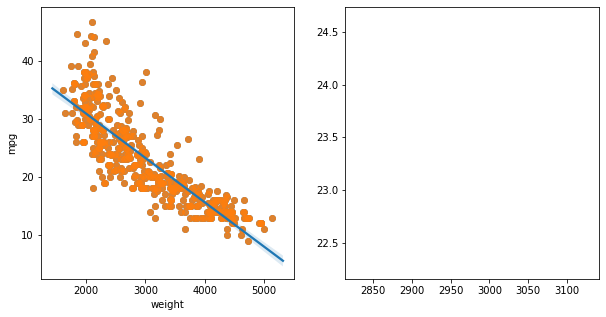

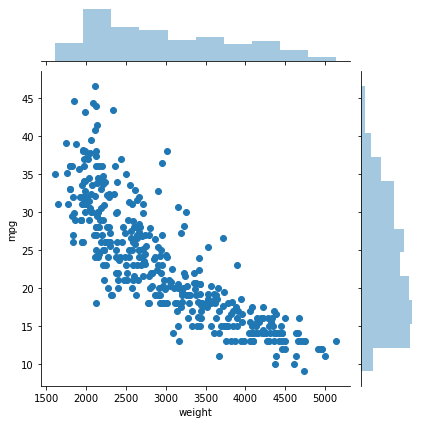

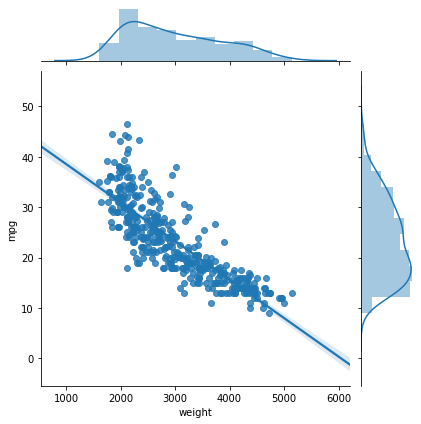

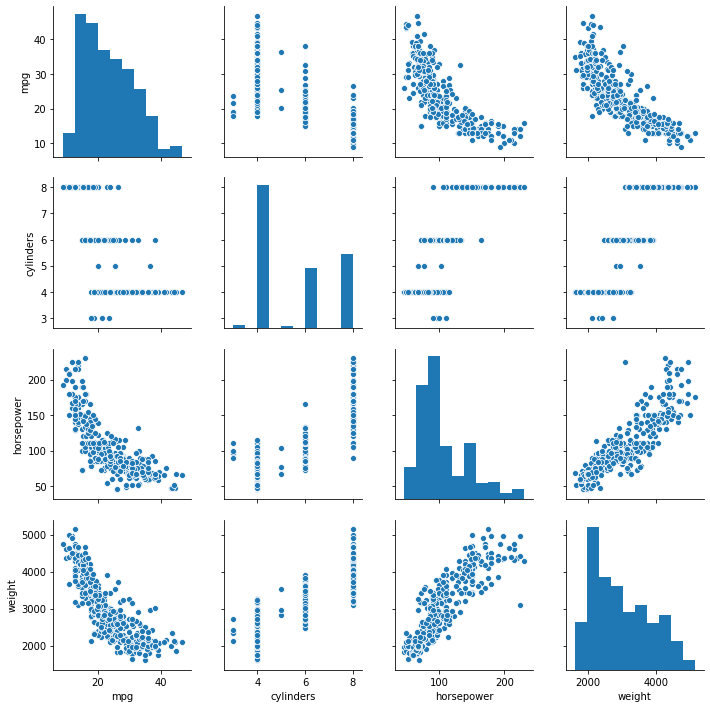

train data 개수 : 274
test data 개수 : 118
0.6822458558299325
기울기 a : [-0.00775343]
절편 b : 46.710366257280086


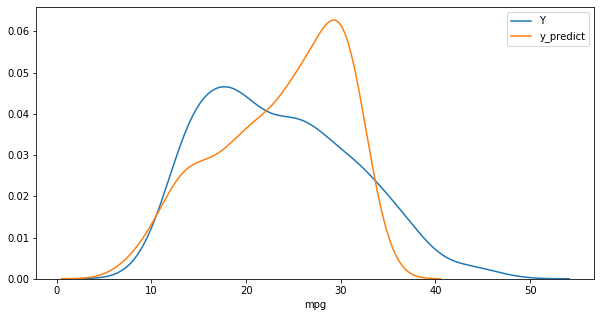

In [1]:
####선형회귀 분석 실습####

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1단계:데이터 준비
df = pd.read_csv('C:/Users/student/Desktop/datas/datas/auto-mpg.csv', header = None)
print(df.info)

#컬럼 이름(변수, 특성이름)지정
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']
print(df.head())

pd.set_option('display.max_columns', 10)
print(df.head())

#2단계 데이터 탐색
print(df.info())
print(df.describe())
print(df['horsepower'].unique())

#Horsepower열에서 ?를 Nan값으로 대체
print(df['horsepower'].replace('?',np.nan, inplace=True))

#horsepower열이 Nan인 행을 삭제
df.dropna(subset=['horsepower'], axis=0, inplace=True)

#문자열 데이터를 실수형 데이터로 변환
df['horsepower'] = df['horsepower'].astype('float')
print(df.describe())

#3단계 분석에 사용할 특성 선택(열, 변수) 선택(연비, 실린더, 마력, 중력)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

print(ndf.head())

#종속변수(mpg)와 다른 변수('cylinders', 'horsepower', 'weight')간의 선형관계 여부 확인

ndf.plot(kind='scatter', x = 'weight', y = 'mpg', c = 'coral', s= 10, figsize = (10, 5))
plt.show()

#seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x = 'weight', y = 'mpg', data=ndf, ax=ax1)  #회귀선을 기본적으로 표시해줌
sns.regplot(x = 'weight', y = 'mpg', data=ndf, ax=ax1, fit_reg=False)
plt.show()
plt.close()

sns.jointplot(x='weight', y='mpg', data=ndf)
sns.jointplot(x='weight', y='mpg', data=ndf, kind='reg')  #회귀선 표시
plt.show()
plt.close()

sns.pairplot(ndf)
plt.show()
plt.close()


#4단계 훈련 데이터와 테스트 데이터로 분리
#독립변수 X : 무게
#종속변수 U : 연비

X = ndf[['weight']]
Y = ndf['mpg']

#train data 와 test data를 7:3비율로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10) #랜덤 추출값 10

print('train data 개수 :', len(X_train))
print('test data 개수 :', len(X_test))

#5단계 : 단순회귀분석 - 학습
from sklearn.linear_model import LinearRegression #선형회귀 라이브러리의 선형회귀분석 모듈

lr = LinearRegression() #단순 선형회귀분석 객체 생성

lr.fit(X_train, Y_train) #학습

r_square = lr.score(X_test, Y_test) #학습 후 결정 계수 계산

print(r_square) #결정 계수 :

#기울기와 절편
print('기울기 a :', lr.coef_)
print('절편 b :', lr.intercept_)

#독립변수에 대한 예측된 종속변수값
y_predict = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(Y, hist=False, label='Y')
ax2 = sns.distplot(y_predict, hist=False, label='y_predict', ax=ax1)
plt.show()
plt.close()


In [ ]:
##############다항  회귀분석 실습 ##########################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1단계: 데이터 준비

df = pd.read_csv('C:/Users/student/Desktop/datas/datas/auto-mpg.csv', header = None)
print(df.info()) 

#컬럼 이름 (변수, 특성 이름) 지정
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

# horsepower열에서 ?를 NaN값으로 대체
df['horsepower'].replace('?', np.nan, inplace=True) 
#horsepower열이 NaN인 행을 삭제
df.dropna(subset=['horsepower'], axis=0, inplace=True)
#문자열 데이터를 실수형 데이터로 변환
df['horsepower'] = df['horsepower'].astype('float')

#3단계 : 분석에 사용할 특성(열, 변수) 선택 (연비, 실린더, 마력, 중력)
ndf = df[[ 'mpg', 'cylinders','horsepower', 'weight' ]]


# 4단계 : 훈련 데이터와 테스트 데이터로 분리
X= ndf[['weight']]   #독립변수 X : 무게
Y=ndf['mpg']    #종속변수 Y : 연비

# train data 와 test data를 7:3 비율로 분리
from sklearn.model_selection import train_test_split
X_train, X_tset, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)  #랜덤 추출값 10


# 5단계 : 단순회귀분석 - 학습
from sklearn.linear_model import LinearRegression  #선형회귀 라이브러리의 선형회귀분석 모듈 
from  sklearn.preprocessing import PolynomialFeatures  #다항식 변환

#다항식 변환
poly = PolynomialFeatures(degree=2)  # 2차항 적용
x_train_poly =poly.fit_transform(X_train)   # X학습데이터를 2차항으로 변형
print(x_train_poly.shape)
print(X_train.shape)

lr = LinearRegression()  #단순 선형회귀분석 객체 생성

lr.fit(x_train_poly, Y_train)  #학습


x_test_poly =poly.fit_transform(X_test) 
r_square = lr.score(x_test_poly, Y_test) # 결정 계수 계산
print(r_square )    #결정 계수 :    0.7087009262975685


print('기울기 a : ', lr.coef_)
print('절편 b : ', lr.intercept_)

#기울기 a :     [ 0.00000000e+00 -1.85768289e-02  1.70491223e-06]
# 절편 b :  62.58071221573144

y_test_predict = lr.predict(x_test_poly)  #test 데이터에 대한 모델의 예측값 구하기

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1, 1)
ax.plot(X_train, Y_train, 'o', label='Train Data')
ax.plot(X_test, y_test_predict, 'r+', label='Predicted Value')  #학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()



#전체 데이터 X 를 2차항으로 변형
X_poly = poly.fit_transform(X)
y_predict = lr.predict(X_poly)   #전체 데이터 X에 대한 모델의 예측값 반환
fig = plt.figure(figsize=(10, 5))
ax1 = sns.distplot(Y, hist=False, label="Y")
ax2 = sns.distplot(y_predict, hist=False, label="Y_predict", ax=ax1)
plt.show()
plt.close()
